In [1]:
import os

print(os.getcwd())

os.chdir(os.path.dirname(os.getcwd()))

print(os.getcwd())


/home/ubuntuuser/projects/learnings/miniai
/home/ubuntuuser/projects/learnings


In [4]:
import torch
from torch import nn, optim
from torch.nn import functional as F

from miniai.miniai import *

In [5]:
# Prepare data and data loaders
train_ds = Dataset(x=torch.randn(100, 10), y=torch.rand(100, 1))
valid_ds = Dataset(x=torch.randn(100, 10), y=torch.rand(100, 1))
dls = DataLoaders(*get_dls(train_ds, valid_ds, bs=10))

In [6]:
# Test DataLoader functionality
print("Testing DataLoader functionality...")
for xb, yb in dls.train:
    print("Batch x shape:", xb.shape)
    print("Batch y shape:", yb.shape)
    break  # Only print the first batch to check shapes

Testing DataLoader functionality...
Batch x shape: torch.Size([10, 10])
Batch y shape: torch.Size([10, 1])


In [7]:
# Define a simple model
model = nn.Sequential(nn.Linear(10, 5), nn.ReLU(), nn.Linear(5, 1))

# Test Model Prediction
print("Testing model predictions...")
xb, yb = next(iter(dls.train))
preds = model(xb)
print("Predictions shape:", preds.shape)

Testing model predictions...
Predictions shape: torch.Size([10, 1])


In [8]:
# Define a simple learner and train 1 epoch
learner = Learner(
    model=model, dls=dls, loss_func=F.mse_loss, opt_func=optim.SGD, lr=0.01
)
learner.fit(1)

In [9]:
# Initialize callbacks and run training to test callbacks
print("Testing Callbacks and training...")
train_cb = TrainCB()
device_cb = DeviceCB()
metrics_cb = MetricsCB()
progress_cb = ProgressCB(plot=False)
learner.fit(
    1, cbs=[train_cb, device_cb, metrics_cb, progress_cb]
)  # Run one epoch of training with callbacks


# Additional Callback Test: Check if Metrics Callback gathers data
if hasattr(metrics_cb, "all_metrics"):
    print("Metrics recorded during training:", metrics_cb.all_metrics)
else:
    print("No metrics recorded.")

Testing Callbacks and training...


loss,epoch,train,time
0.103,0,train,00:00
0.098,0,eval,00:00


Metrics recorded during training: {'loss': <torcheval.metrics.aggregation.mean.Mean object at 0x7f1800969e90>}


Testing Image Display Functionality...


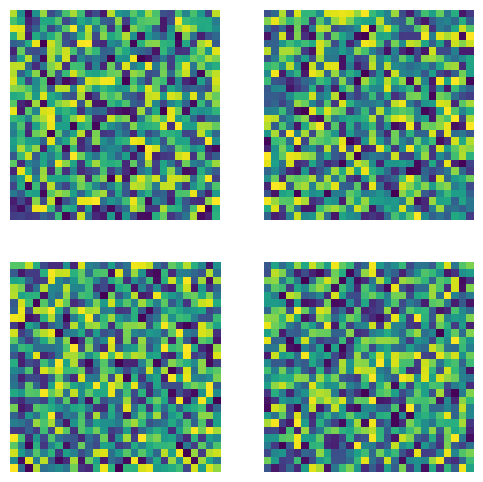

In [10]:
print("Testing Image Display Functionality...")
show_images([torch.rand(28, 28) for _ in range(4)], nrows=2, ncols=2, figsize=(6, 6))